<a href="https://colab.research.google.com/github/sahilfaizal01/Multi-Disease-Prediction-App/blob/main/Parkinson_Disease_Prediction_Using_MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMPORTING THE LIBRARIES**

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# **DATA COLLECTION AND ANALYSIS**

In [9]:
df = pd.read_csv('/content/parkinsons.csv') 

In [10]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [11]:
df.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [13]:
df.shape

(195, 24)

In [14]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [16]:
df['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

## 0 -> Healthy
## 1 -> Positive

In [18]:
df.groupby('status').mean()

<ipython-input-18-b48f8e817573>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('status').mean()


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,
0,181.937771,223.636750,145.207292,0.003866,0.000023,0.001925,0.002056,0.005776,0.017615,0.162958,...,0.013305,0.028511,0.011483,24.678750,0.442552,0.695716,-6.759264,0.160292,2.154491,0.123017
1,145.180762,188.441463,106.893558,0.006989,0.000051,0.003757,0.003900,0.011273,0.033658,0.321204,...,0.027600,0.053027,0.029211,20.974048,0.516816,0.725408,-5.333420,0.248133,2.456058,0.233828


In [21]:
X = df.drop(columns = ['status','name'],axis=1)
y = df['status']

In [22]:
X

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,...,0.02745,0.07008,0.02764,19.517,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,...,0.01879,0.04812,0.01810,19.147,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,...,0.01667,0.03804,0.10715,17.883,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,...,0.01588,0.03794,0.07223,19.020,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [23]:
y

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64

In [24]:
X.corr().style.format("{:.4}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.0,0.401,0.5965,-0.118,-0.382,-0.07619,-0.1122,-0.07621,-0.09837,-0.07374,-0.09472,-0.07068,-0.07777,-0.09473,-0.02198,0.05914,-0.3839,-0.446,-0.4137,-0.2495,0.178,-0.3724
MDVP:Fhi(Hz),0.401,1.0,0.08495,0.1021,-0.0292,0.09718,0.09113,0.09715,0.002281,0.04347,-0.003743,-0.009997,0.004937,-0.003733,0.1638,-0.02489,-0.1124,-0.3431,-0.07666,-0.002954,0.1763,-0.06954
MDVP:Flo(Hz),0.5965,0.08495,1.0,-0.1399,-0.2778,-0.1005,-0.09583,-0.1005,-0.1445,-0.1191,-0.1507,-0.1011,-0.1073,-0.1507,-0.1087,0.2109,-0.4001,-0.05041,-0.3949,-0.2438,-0.1006,-0.3401
MDVP:Jitter(%),-0.118,0.1021,-0.1399,1.0,0.9357,0.9903,0.9743,0.9903,0.7691,0.8043,0.7466,0.7256,0.7583,0.7466,0.907,-0.7282,0.3607,0.09857,0.6936,0.3851,0.4334,0.7215
MDVP:Jitter(Abs),-0.382,-0.0292,-0.2778,0.9357,1.0,0.9229,0.8978,0.9229,0.7033,0.7166,0.6972,0.649,0.6488,0.6972,0.835,-0.6568,0.4418,0.175,0.7358,0.3885,0.3107,0.7482
MDVP:RAP,-0.07619,0.09718,-0.1005,0.9903,0.9229,1.0,0.9573,1.0,0.7596,0.7907,0.7449,0.7099,0.7375,0.7449,0.9195,-0.7215,0.3421,0.06408,0.6483,0.3244,0.4266,0.671
MDVP:PPQ,-0.1122,0.09113,-0.09583,0.9743,0.8978,0.9573,1.0,0.9573,0.7978,0.8392,0.7636,0.7868,0.8041,0.7636,0.8446,-0.7315,0.3333,0.1963,0.7165,0.4076,0.4125,0.7696
Jitter:DDP,-0.07621,0.09715,-0.1005,0.9903,0.9229,1.0,0.9573,1.0,0.7596,0.7906,0.7449,0.7099,0.7374,0.7449,0.9195,-0.7215,0.3421,0.06403,0.6483,0.3244,0.4266,0.671
MDVP:Shimmer,-0.09837,0.002281,-0.1445,0.7691,0.7033,0.7596,0.7978,0.7596,1.0,0.9873,0.9876,0.9828,0.9501,0.9876,0.7222,-0.8353,0.4474,0.16,0.6547,0.452,0.5071,0.6938
MDVP:Shimmer(dB),-0.07374,0.04347,-0.1191,0.8043,0.7166,0.7907,0.8392,0.7906,0.9873,1.0,0.9632,0.9738,0.961,0.9632,0.7445,-0.8278,0.4107,0.1652,0.6525,0.4543,0.5122,0.6951


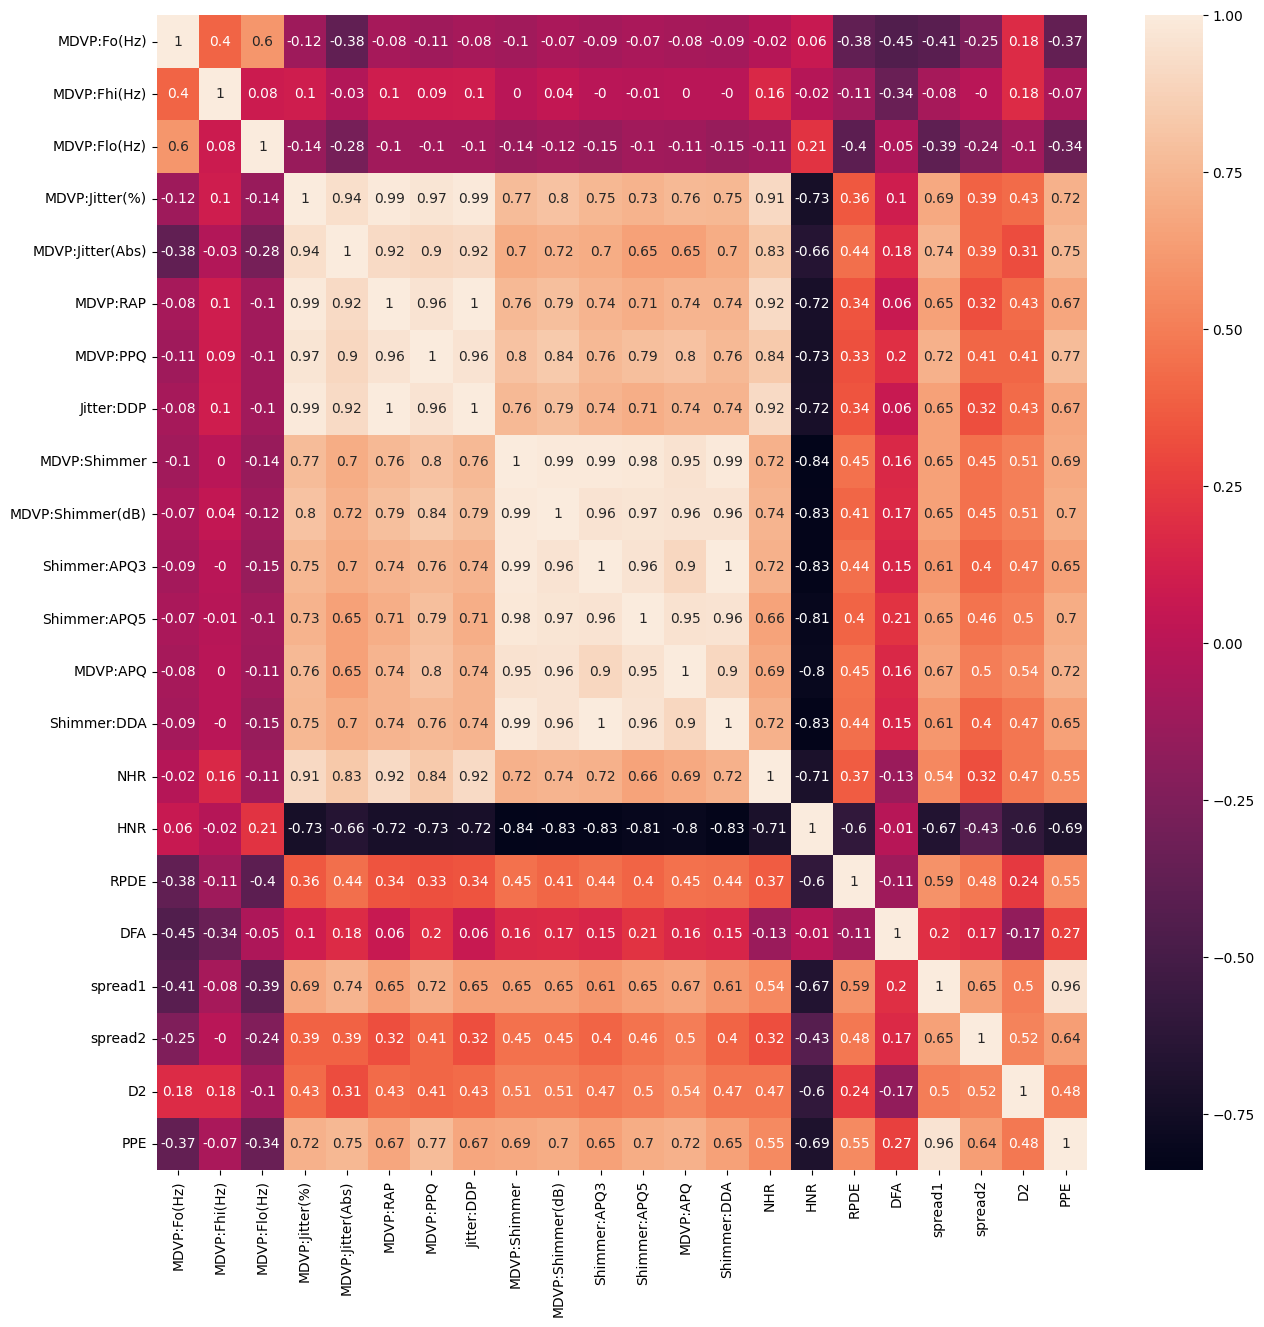

In [25]:
f, ax = plt.subplots(figsize=(15, 15))
matrix = X.corr().round(2)
sns.heatmap(matrix, annot=True)
plt.show()

# SCALING

In [26]:
scaler = StandardScaler()
scaler.fit(X)
standardized_data = scaler.transform(X)

In [27]:
X = standardized_data

# SPLITTING THE DATASET

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size = 0.2, stratify=y, random_state=2)

In [29]:
print(X.shape, X_train.shape, X_test.shape)

(195, 22) (156, 22) (39, 22)


# TRAIN THE CLASSIFIER

## **SVM**

In [30]:
classifier = svm.SVC(kernel='linear')

In [31]:
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

## **LOGISTIC REGRESSION**

In [32]:
reg = LogisticRegression()
reg.fit(X_train, Y_train)

LogisticRegression()

## **RANDOM FOREST**

In [33]:
rf = RandomForestClassifier()
rf.fit(X_train,Y_train)

RandomForestClassifier()

## **XGBOOST**

In [34]:
xgb = XGBClassifier()
xgb.fit(X_train,Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

## **DECISION TREES**

In [35]:
dt = DecisionTreeClassifier()
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

# MODEL EVALUATION

## **SVM**

In [36]:
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [37]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.8910256410256411


In [38]:
# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [39]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.8974358974358975


In [40]:
print(classification_report(X_test_prediction,Y_test))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80        10
           1       0.93      0.93      0.93        29

    accuracy                           0.90        39
   macro avg       0.87      0.87      0.87        39
weighted avg       0.90      0.90      0.90        39



## **LOGISTIC REGRESSION**

In [42]:
lr_train_pred = reg.predict(X_train)
lr_train_acc = accuracy_score(lr_train_pred, Y_train)
print('Accuracy score of the training data : ', lr_train_acc)
lr_test_pred = reg.predict(X_test)
lr_test_acc = accuracy_score(lr_test_pred, Y_test)
print('Accuracy score of the training data : ', lr_test_acc)

Accuracy score of the training data :  0.8717948717948718
Accuracy score of the training data :  0.8461538461538461


In [43]:
print(classification_report(lr_test_pred,Y_test))

              precision    recall  f1-score   support

           0       0.60      0.75      0.67         8
           1       0.93      0.87      0.90        31

    accuracy                           0.85        39
   macro avg       0.77      0.81      0.78        39
weighted avg       0.86      0.85      0.85        39



## **RANDOM FOREST**

In [44]:
rf_train_pred = rf.predict(X_train)
rf_train_acc = accuracy_score(rf_train_pred, Y_train)
print('Accuracy score of the training data : ', rf_train_acc)
rf_test_pred = rf.predict(X_test)
rf_test_acc = accuracy_score(rf_test_pred, Y_test)
print('Accuracy score of the training data : ', rf_test_acc)

Accuracy score of the training data :  1.0
Accuracy score of the training data :  0.9487179487179487


In [45]:
print(classification_report(rf_test_pred,Y_test))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89         8
           1       1.00      0.94      0.97        31

    accuracy                           0.95        39
   macro avg       0.90      0.97      0.93        39
weighted avg       0.96      0.95      0.95        39



In [62]:
import pickle
filename = 'parkinson_model.sav'
pickle.dump(rf, open(filename, 'wb'))

<Axes: xlabel='Predicted', ylabel='Actual'>

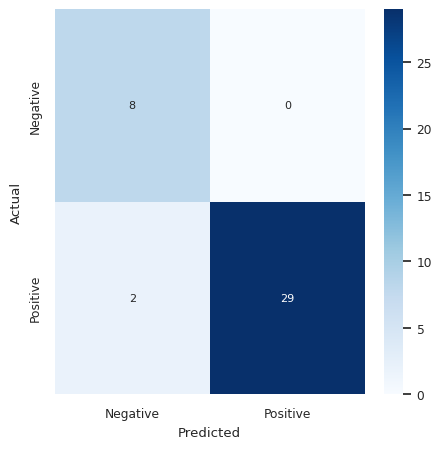

In [58]:
data = confusion_matrix(rf_test_pred,Y_test)
clm = ['Negative','Positive']
df_cm = pd.DataFrame(data, columns=clm, index = clm)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (5,5))
sns.set(font_scale=0.8)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 8})# font size

## **XGBOOST**

In [46]:
xgb_train_pred = xgb.predict(X_train)
xgb_train_acc = accuracy_score(xgb_train_pred, Y_train)
print('Accuracy score of the training data : ', xgb_train_acc)
xgb_test_pred = xgb.predict(X_test)
xgb_test_acc = accuracy_score(xgb_test_pred, Y_test)
print('Accuracy score of the training data : ', xgb_test_acc)

Accuracy score of the training data :  1.0
Accuracy score of the training data :  0.9487179487179487


In [47]:
print(classification_report(xgb_test_pred,Y_test))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89         8
           1       1.00      0.94      0.97        31

    accuracy                           0.95        39
   macro avg       0.90      0.97      0.93        39
weighted avg       0.96      0.95      0.95        39



## **DECISION TREES**

In [48]:
dt_train_pred = dt.predict(X_train)
dt_train_acc = accuracy_score(dt_train_pred, Y_train)
print('Accuracy score of the training data : ', dt_train_acc)
dt_test_pred = dt.predict(X_test)
dt_test_acc = accuracy_score(dt_test_pred, Y_test)
print('Accuracy score of the training data : ', dt_test_acc)

Accuracy score of the training data :  1.0
Accuracy score of the training data :  0.8717948717948718


In [49]:
print(classification_report(dt_test_pred,Y_test))

              precision    recall  f1-score   support

           0       0.90      0.69      0.78        13
           1       0.86      0.96      0.91        26

    accuracy                           0.87        39
   macro avg       0.88      0.83      0.85        39
weighted avg       0.87      0.87      0.87        39



### **The Random Forest and XGBoost models are seen as the best classifiers with minimal trend of overfitting**

# **DATA-BALANCING USING SMOTE**

In [50]:
from imblearn.over_sampling import SMOTE
from collections import Counter
counter = Counter(y)
print('Before Upsampling:',counter)
oversample = SMOTE()
Xm, ym = oversample.fit_resample(X, y)
# summarize the new class distribution
counterm = Counter(ym)
print('After Upsampling:',counterm)

Before Upsampling: Counter({1: 147, 0: 48})
After Upsampling: Counter({1: 147, 0: 147})


In [51]:
Xm_train, Xm_test, Ym_train, Ym_test = train_test_split(Xm,ym, test_size = 0.20, stratify=ym, random_state=2)

In [52]:
classifier1 = svm.SVC(kernel='linear')
classifier1.fit(Xm_train, Ym_train)
classifier1_train_pred = classifier1.predict(Xm_train)
classifier1_train_acc = accuracy_score(classifier1_train_pred, Ym_train)
print('Accuracy score of the training data : ', classifier1_train_acc)
classifier1_test_pred = classifier1.predict(Xm_test)
classifier1_test_acc = accuracy_score(classifier1_test_pred, Ym_test)
print('Accuracy score of the testing data : ', classifier1_test_acc)

Accuracy score of the training data :  0.8893617021276595
Accuracy score of the testing data :  0.8135593220338984


In [53]:
lr1 = LogisticRegression()
lr1.fit(Xm_train, Ym_train)
lr1_train_pred = lr1.predict(Xm_train)
lr1_train_acc = accuracy_score(lr1_train_pred, Ym_train)
print('Accuracy score of the training data : ', lr1_train_acc)
lr1_test_pred = lr1.predict(Xm_test)
lr1_test_acc = accuracy_score(lr1_test_pred, Ym_test)
print('Accuracy score of the testing data : ', lr1_test_acc)

Accuracy score of the training data :  0.8723404255319149
Accuracy score of the testing data :  0.8135593220338984


In [54]:
rf1 = RandomForestClassifier()
rf1.fit(Xm_train, Ym_train)
rf1_train_pred = rf1.predict(Xm_train)
rf1_train_acc = accuracy_score(rf1_train_pred, Ym_train)
print('Accuracy score of the training data : ', rf1_train_acc)
rf1_test_pred = rf1.predict(Xm_test)
rf1_test_acc = accuracy_score(rf1_test_pred, Ym_test)
print('Accuracy score of the testing data : ', rf1_test_acc)

Accuracy score of the training data :  1.0
Accuracy score of the testing data :  0.9491525423728814


<Axes: xlabel='Predicted', ylabel='Actual'>

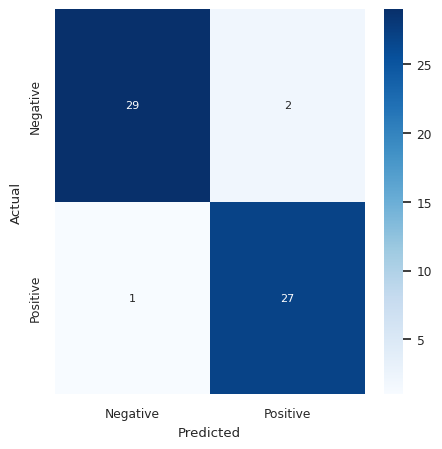

In [60]:
data = confusion_matrix(rf1_test_pred,Ym_test)
clm = ['Negative','Positive']
df_cm = pd.DataFrame(data, columns=clm, index = clm)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (5,5))
sns.set(font_scale=0.8)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 8})# font size

# **MAKING A PREDICTIVE SYSTEM**

In [61]:
input_data = (197.07600,206.89600,192.05500,0.00289,0.00001,0.00166,0.00168,0.00498,0.01098,0.09700,0.00563,0.00680,0.00802,0.01689,0.00339,26.77500,0.422229,0.741367,-7.348300,0.177551,1.743867,0.085569)

# changing input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the data
std_data = scaler.transform(input_data_reshaped)

prediction = rf.predict(std_data)
print(prediction)


if (prediction[0] == 0):
  print("The Person does not have Parkinsons Disease")

else:
  print("The Person has Parkinsons")

[0]
The Person does not have Parkinsons Disease


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
